<a href="https://colab.research.google.com/github/Ichigoz/Mineria/blob/main/Asignacion2/AnaMarchena_Asignacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Dataset** - Ana Marchena [28309134]

![PNG](https://drive.google.com/uc?export=view&id=1Mvo9NvCnuQc7me6ZLXtsH_gXH2mJduNs)

**Carga y visualización del Dataset:**

Iniciamos con la carga del dataset proporcionado por medio de link de drive, para poder ir vizualizando como se distribuye nuestra información.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = f'https://docs.google.com/spreadsheets/d/1if3NpPI6h_N-LF9ESQyPsKqdLpQDmW6zdfFt3CakLJM/export?format=csv'

df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Descripción del dataset:**

Como observamos anteriormente en el encabezado de nuestro dataset, contamos con 14 columnas para el mismo, donde todas contienen unicamente variables de tipo numérico, y tenemos 1025 filas en total.

In [ ]:
print(f"Cantidades: {df.shape[0]} filas, {df.shape[1]} columnas")
print("\nTipos de datos:")
print(df.dtypes)

Cantidades: 1025 filas, 14 columnas

Tipos de datos:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


**Estadísticas descriptivas:**

Entre algunos de los valores mas resaltantes dentro de los datos obtenidos podemos encontrar:


1.   El promedio de edad es de 54.4 años, con una mediana de 56. Esto nos puede indicar que la muestra está compuesta principalmente por adultos de mediana edad y personas mayores.
2. Para la columna sex la media es de 0.69. Dado que es una variable binaria, esto nos dice que aproximadamente el 70% de las personas en el estudio son hombres, lo que nos puede indicar un sesgo de género en la recolección de los datos.

In [ ]:
stats = df.describe().loc[['mean', 'std', 'min', 'max']]
stats.loc['mediana'] = df.median()
print(stats.transpose())

                mean        std    min    max  mediana
age        54.434146   9.072290   29.0   77.0     56.0
sex         0.695610   0.460373    0.0    1.0      1.0
cp          0.942439   1.029641    0.0    3.0      1.0
trestbps  131.611707  17.516718   94.0  200.0    130.0
chol      246.000000  51.592510  126.0  564.0    240.0
fbs         0.149268   0.356527    0.0    1.0      0.0
restecg     0.529756   0.527878    0.0    2.0      1.0
thalach   149.114146  23.005724   71.0  202.0    152.0
exang       0.336585   0.472772    0.0    1.0      0.0
oldpeak     1.071512   1.175053    0.0    6.2      0.8
slope       1.385366   0.617755    0.0    2.0      1.0
ca          0.754146   1.030798    0.0    4.0      0.0
thal        2.323902   0.620660    0.0    3.0      2.0
target      0.513171   0.500070    0.0    1.0      1.0


**Valores faltantes:**

Podemos denotar según los datos resultantes que no contamos con valores nulos dentro de nuestro dataset, lo cual es una gran ventaja ya que contamos con información completa.

In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Histogramas:**

Podemos observar según las formas obtenidas que:

1. Como comentamos anteriormente en un principio, la distribucion de la edad tiene una mayor concentración de pacientes entre los 50 y 60 años, y hay muy pocos datos de personas jóvenes,menores de 30.
2. Por otro lado para la distribución de la presión arterial podemos denotar que la mayoria se distribuyen unifromemente entre un ragno de 120-140 mmHg, sin embargo podemos señalar una pequeña barra de interes dentro de un rango menos común de 200 mmHg que puede llegar a mostrar la cantidad de pacientes con hipertensión en nuestra muestra.
3. Por ultimo tenemos un caso parecido a la distribución anterior, para el colesterol la muestra se distribuye en un rango común entre los 200 - 300, sin embargo existen unos pocos casos criticos que superan esta medida normal del lado derecho de la gráfica.

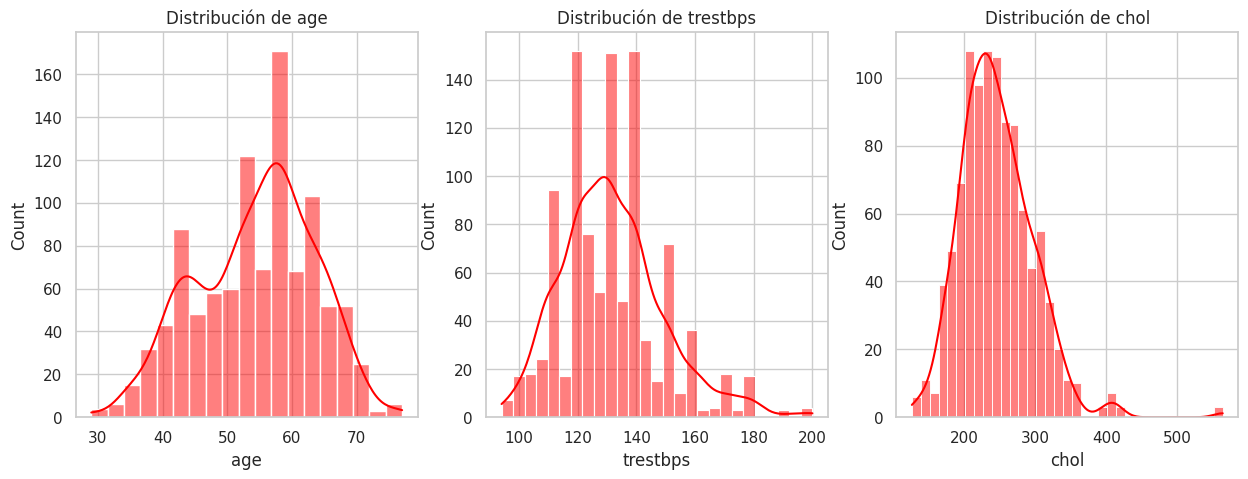

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cols = ['age', 'trestbps', 'chol']

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Distribución de {col}')
plt.show()

**Box plots:**

Mediante el análisis de los siguientes box plots podremos identificar de mejor manera algunso de los datos que ya hemos estado evaluando anteriormente, como en las variables de colesterol y presión arterial donde se presentan una cantidad considerable de valores atípicos superiores, lo cual sugiere la presencia de casos con perfiles de gran riesgo clinico en la muestra. Por otro lado, la variable de frecuencia cardíaca muestra una distribución más uniforme a diferencia, con solo un valor atípico en el extremo inferior.

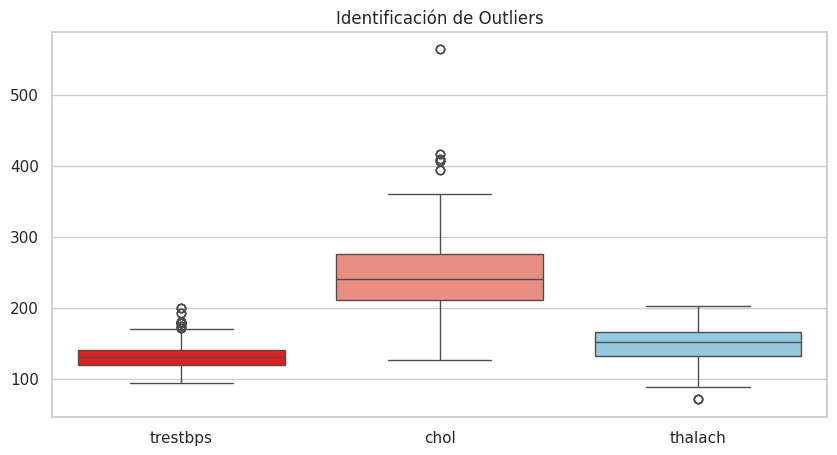

In [ ]:
plt.figure(figsize=(10, 5))
colores = ['red', 'salmon', 'skyblue']
sns.boxplot(data=df[['trestbps', 'chol', 'thalach']], palette=colores)
plt.title("Identificación de Outliers")
plt.show()

**Análisis de correlacíon:**

**1. Heatmap**

Mediante el siguiente heatmap podemos observar de mejor forma que los factores que más influyen en un diagnóstico positivo de enfermedad cardíaca son el dolor de pecho y la frecuencia cardiaca, ya que presentan una relación directa, por lo que, mientras los valores sean más altos en estas pruebas mayor sera la probabilidad de obtener un diagnostico positivo. Por otro lado, las variables metabólicas como el colesterol y el azucar en sangre tienen una influencia mucho menos relevante en este conjunto de datos, lo que nos indica que, para esta población, los síntomas físicos son predictores mucho más confiables que los niveles de grasa o glucosa en la sangre.

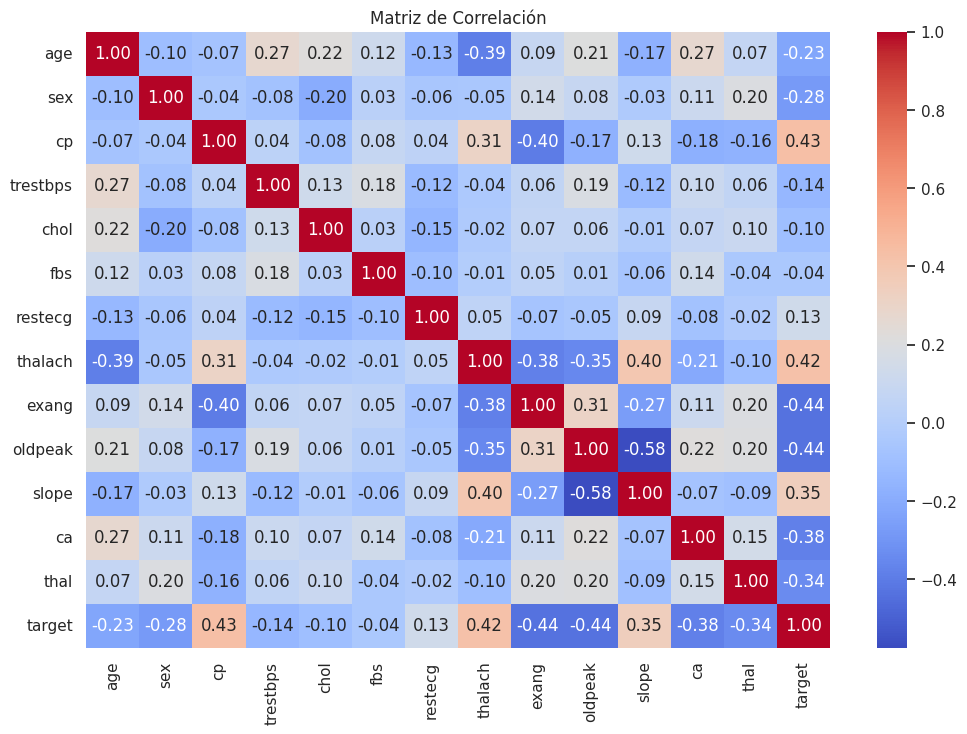

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**2. Scatter plot del par de variables con mayor correlacíon:**

En un inicio, hay que aclarar que aunque la mayor correlación realmente está entre oldpeak y slope, decidimos usar la edad y la frecuencia cardíaca máxima para este gráfico, dado que las otras variables llegan a verse como líneas horizontales por los datos que contienen (oldpeak es continua y slope es multicase con solo 3 valores posibles) lo cual no nos deja ver bien el comportamiento de los puntos. En cambio en el nuevo gráfico resultante se nota claramente que, a medida que pasan los años, el corazón alcanza menos latidos por naturaleza. Pero lo principal a observar es la diferencia de colores en el mismo ya que muestra que los pacientes con mayor riesgo (clase 0) no solo suelen ser mayores, sino que sus latidos máximos son mucho más bajos que los de la gente sana (clase 1) de su misma edad. Al final, esto nos confirma que si el corazón aguanta poco el esfuerzo físico, es una señal clave que, junto con la edad, ayuda mucho a detectar un posible problema cardíaco.

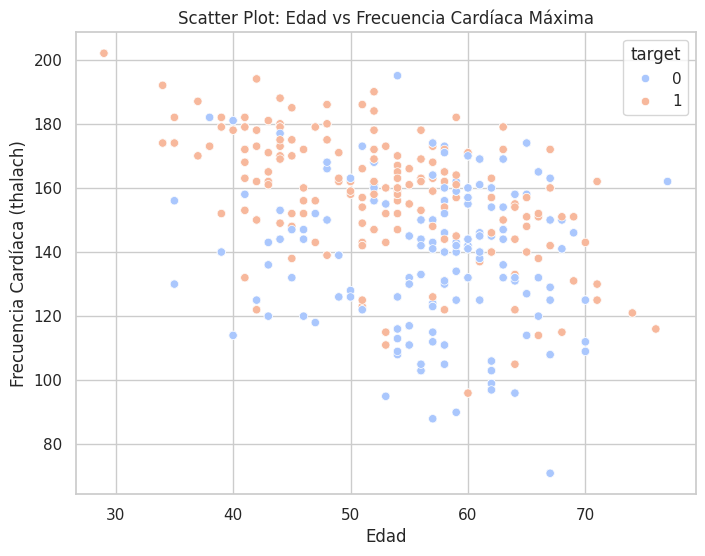

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', data=df, hue='target', palette='coolwarm')

plt.title('Scatter Plot: Edad vs Frecuencia Cardíaca')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardíaca (thalach)')
plt.show()